# Granger Causality

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from statsmodels.tsa.stattools import grangercausalitytests as granger_causality

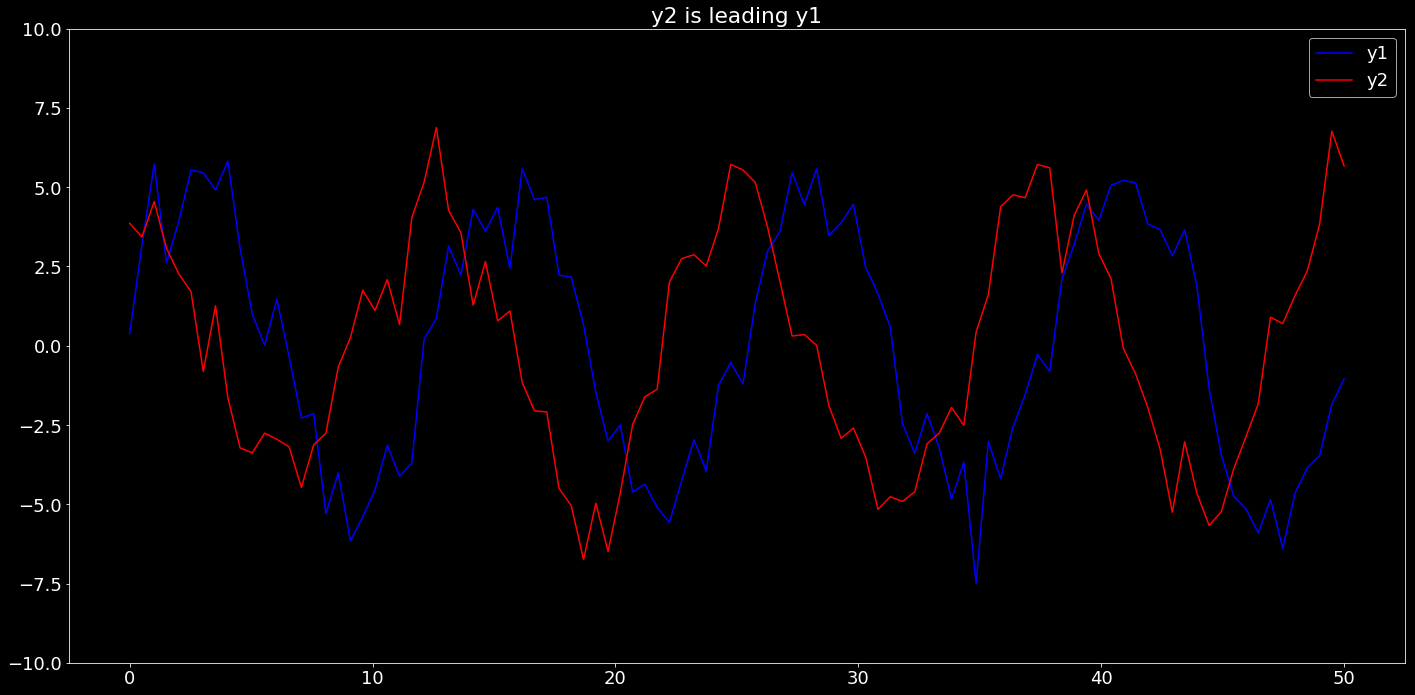

In [4]:
n = 100
x = np.linspace(0, 50, n)
y1 = 5 * np.sin(x / 2) + np.random.randn(n)
y2 = 5 * np.cos(x / 2) + np.random.randn(n)

with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(20, 10))

    ax.plot(x, y1, 'b', label='y1')
    ax.plot(x, y2, 'r', label='y2')
    ax.set_ylim(-10, 10)
    ax.set_title('y2 is leading y1')
    ax.legend(loc='best')

    plt.tight_layout()

In [5]:
help(granger_causality)

Help on function grangercausalitytests in module statsmodels.tsa.stattools:

grangercausalitytests(x, maxlag, addconst=True, verbose=True)
    four tests for granger non causality of 2 timeseries
    
    all four tests give similar results
    `params_ftest` and `ssr_ftest` are equivalent based on F test which is
    identical to lmtest:grangertest in R
    
    Parameters
    ----------
    x : array, 2d
        data for test whether the time series in the second column Granger
        causes the time series in the first column
    maxlag : integer
        the Granger causality test results are calculated for all lags up to
        maxlag
    verbose : bool
        print results if true
    
    Returns
    -------
    results : dictionary
        all test results, dictionary keys are the number of lags. For each
        lag the values are a tuple, with the first element a dictionary with
        teststatistic, pvalues, degrees of freedom, the second element are
        the OLS estim

In [9]:
X = np.concatenate((y1.reshape(-1, 1), y2.reshape(-1, 1)), axis=1)

result = granger_causality(X, maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=39.7692 , p=0.0000  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=41.0120 , p=0.0000  , df=1
likelihood ratio test: chi2=34.3142 , p=0.0000  , df=1
parameter F test:         F=39.7692 , p=0.0000  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=36.4562 , p=0.0000  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=76.8323 , p=0.0000  , df=2
likelihood ratio test: chi2=56.7283 , p=0.0000  , df=2
parameter F test:         F=36.4562 , p=0.0000  , df_denom=93, df_num=2
